In [1]:
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.layers import Dense, Activation, Dropout, Flatten
from keras import optimizers
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
import numpy as np 
import skimage.io as io
import skimage.transform as trans
from pylab import*
import PIL

Using TensorFlow backend.


In [2]:
!tar zxf data.tar.gz 

In [3]:
img_width = 150
img_height = 150
train_data_dir = 'data/train'
valid_data_dir = 'data/validation'

datagen = ImageDataGenerator(rescale = 1./255)

In [4]:
train_generator = datagen.flow_from_directory(directory=train_data_dir,
											   target_size=(img_width,img_height),
											   classes=['dogs','cats'],
											   class_mode='binary',
											   batch_size=16)

validation_generator = datagen.flow_from_directory(directory=valid_data_dir,
											   target_size=(img_width,img_height),
											   classes=['dogs','cats'],
											   class_mode='binary',
											   batch_size=32)

Found 780 images belonging to 2 classes.
Found 84 images belonging to 2 classes.


In [5]:
model =Sequential()

model.add(Conv2D(32,(3,3), input_shape=(img_width, img_height, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [6]:
training = model.fit_generator(generator=train_generator, steps_per_epoch=1024 // 16,epochs=12,validation_data=validation_generator,validation_steps=832//16)

Epoch 1/12
64/64 [==============================] - 72s 1s/step - loss: 0.6943 - acc: 0.5427 - val_loss: 0.8361 - val_acc: 0.5027
Epoch 2/12
64/64 [==============================] - 69s 1s/step - loss: 0.6606 - acc: 0.6087 - val_loss: 0.6535 - val_acc: 0.5979
Epoch 3/12
64/64 [==============================] - 68s 1s/step - loss: 0.6095 - acc: 0.6934 - val_loss: 0.6577 - val_acc: 0.5704
Epoch 4/12
64/64 [==============================] - 69s 1s/step - loss: 0.5343 - acc: 0.7451 - val_loss: 0.7379 - val_acc: 0.5815
Epoch 5/12
64/64 [==============================] - 68s 1s/step - loss: 0.4715 - acc: 0.7907 - val_loss: 0.6747 - val_acc: 0.6315
Epoch 6/12
64/64 [==============================] - 68s 1s/step - loss: 0.3994 - acc: 0.8272 - val_loss: 0.8694 - val_acc: 0.6768
Epoch 7/12
64/64 [==============================] - 68s 1s/step - loss: 0.3673 - acc: 0.8372 - val_loss: 0.8471 - val_acc: 0.6178
Epoch 8/12
64/64 [==============================] - 68s 1s/step - loss: 0.2674 - acc: 0.89

In [12]:
image=imread('./data/TestImages/cat.1.jpg')

In [13]:
im=trans.resize(image,(150,150))
img=np.reshape(im,(1,)+im.shape)

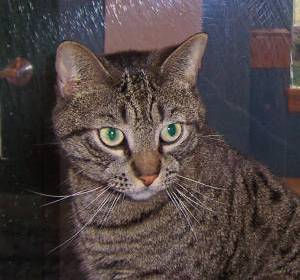

In [15]:
from IPython.display import Image, display
display(Image('./data/TestImages/cat.1.jpg'))

In [16]:
out=model.predict_classes(img)
if out[0]==0:
  print('Dog')
else:
  print('cat')

cat
